In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
import cv2
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import warnings
from PIL import Image, ImageStat
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

https://towardsdatascience.com/finding-duplicate-images-with-python-71c04ec8051

In [2]:
arr = []
file_name = []

for i in tqdm(glob('D:/contest/dataset/*/*')):
  image_org = Image.open(i)
  image_org = image_org.resize((24, 24))
  pix_mean = ImageStat.Stat(image_org).mean
  file_name.append(i)
  arr.append(pix_mean) 
  
df = pd.DataFrame({'file_name':file_name, 'stat':arr})
print(df)

100%|██████████| 25503/25503 [43:03<00:00,  9.87it/s] 


                                               file_name  \
0      D:/contest/dataset\L2_10\aamhfbsxjoqkqsxnnpoy.jpg   
1      D:/contest/dataset\L2_10\aatdcomdixgejmiibsft.jpg   
2      D:/contest/dataset\L2_10\aatmmprdzkzdkbfcslkx.jpg   
3      D:/contest/dataset\L2_10\abaoovbyxzqodvhoasko.jpg   
4      D:/contest/dataset\L2_10\abymagsohyagiheolkhk.jpg   
...                                                  ...   
25498   D:/contest/dataset\L2_3\zuyxgwtnpncfpttzhuec.jpg   
25499   D:/contest/dataset\L2_3\zvbqrvzwlfkxmnhoqpod.jpg   
25500   D:/contest/dataset\L2_3\zwmkrkdispfwivnyocie.jpg   
25501   D:/contest/dataset\L2_3\zxlzcnkvnfdvekmznuqv.jpg   
25502   D:/contest/dataset\L2_3\zygzdtbuxudahvppqdzo.jpg   

                                                    stat  
0                          [226.96875, 226.21875, 228.5]  
1      [233.47222222222223, 229.203125, 227.932291666...  
2      [166.66666666666666, 167.15972222222223, 167.6...  
3      [215.43229166666666, 213.27430555555

In [3]:
df1 = df.loc[df['stat'].duplicated() == True]
df1

,file_name,stat
2587,D:/contest/dataset\L2_15\diplnantwveryfzuatnf.jpg,"[224.92881944444446, 224.92881944444446, 224.9..."
2965,D:/contest/dataset\L2_15\kdmaxiwmoyifwyjvkrcj.jpg,"[200.28472222222223, 189.25520833333334, 183.2..."
4124,D:/contest/dataset\L2_20\mkvssezrfdkcqgtgwgsl.png,"[245.84375, 244.71701388888889, 243.6805555555..."
6875,D:/contest/dataset\L2_25\frsjugprwdpqlezqewcg.jpg,"[238.45138888888889, 238.45138888888889, 238.4..."
7246,D:/contest/dataset\L2_25\hixorurpezwwmksajahz.jpg,"[250.75520833333334, 250.75520833333334, 250.7..."
10988,D:/contest/dataset\L2_25\wzgboyiphrevmwfmuuup.jpg,"[238.81770833333334, 238.81770833333334, 238.8..."
11813,D:/contest/dataset\L2_27\ggccfzleuklyrqmjrkcj.jpg,"[244.95659722222223, 244.95659722222223, 244.9..."
11842,D:/contest/dataset\L2_27\iahdnnwxqusffouscleo.jpg,"[230.08333333333334, 228.87673611111111, 228.4..."
12040,D:/contest/dataset\L2_27\tpicijctxcuijjrhzbqa.png,"[235.96527777777777, 235.96527777777777, 235.9..."
12084,D:/contest/dataset\L2_27\wxnmgfgynrdjugycktqq.jpg,"[231.65625, 231.62152777777777, 231.6510416666..."


In [5]:
len(df1)

31

In [21]:
d1 = df.loc[df['file_name'] == 'D:/contest/dataset\L2_15\diplnantwveryfzuatnf.jpg']
d1.stat.values

array([list([224.92881944444446, 224.92881944444446, 224.92881944444446])],
      dtype=object)

In [23]:
df.loc[df.stat.values == d1.stat.values]

,file_name,stat
1673,D:/contest/dataset\L2_10\wznjmhnjyilyibpdqsoz.jpg,"[224.92881944444446, 224.92881944444446, 224.9..."
2587,D:/contest/dataset\L2_15\diplnantwveryfzuatnf.jpg,"[224.92881944444446, 224.92881944444446, 224.9..."


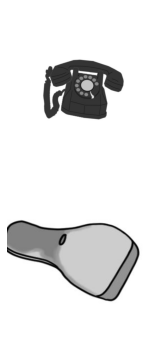

In [35]:
import matplotlib.image as img

image1_path = 'D:/contest/dataset\L2_10\wznjmhnjyilyibpdqsoz.jpg'
image2_path = 'D:/contest/dataset\L2_15\diplnantwveryfzuatnf.jpg'

image1 = img.imread(image1_path)
image2 = img.imread(image2_path)

plt.figure(figsize=(6,6))
plt.subplot(2, 1, 1)  
plt.imshow(image1) ## 이미지 출력
plt.axis('off') ## 축 제거

plt.subplot(2, 1, 2) 
plt.imshow(image2) ## 이미지 출력
plt.axis('off') ## 축 제거
plt.show()